In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [3]:
dataset = pd.read_csv("Household_power_consumption.csv")

C:\Users\bhase\AppData\Local\Temp\ipykernel_15980\810011964.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Household_power_consumption.csv")


In [4]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
dataset.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [7]:
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN


In [9]:
dataset.replace('?', np.nan, inplace=True)
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset = dataset.dropna()
for i in dataset.columns[2:] :
  dataset[i] = dataset[i].astype('float64')
# dataset.isnull().sum().sum()

In [11]:
dataset.shape
dataset.isnull().sum().sum()

0

In [12]:
values = dataset.values
dataset['Sub_metering_4'] = (values[:,2] * 1000 / 60) - (values[:,6] + values[:,7] + values[:,8])
dataset['Sub_metering_4'] = dataset['Sub_metering_4'].astype('float64')

In [13]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [14]:
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766667
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733333
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,15.566667


In [15]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [16]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


c:\Users\bhase\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

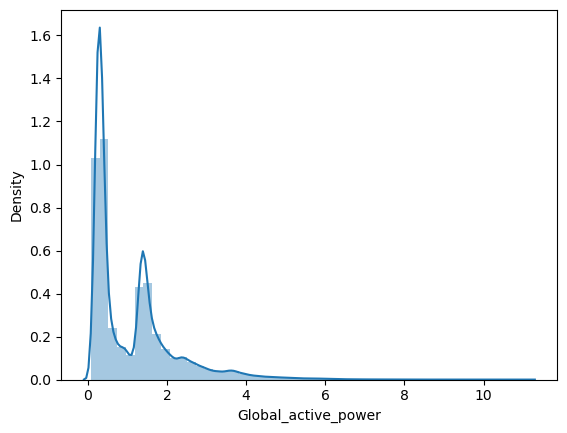

In [17]:
sns.distplot(dataset['Global_active_power'])

c:\Users\bhase\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_reactive_power'>

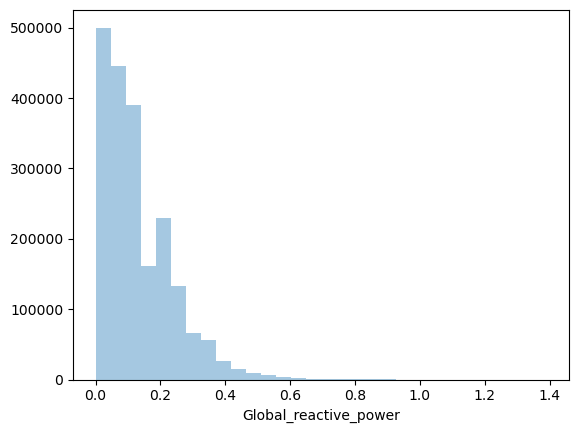

In [18]:
sns.distplot(dataset['Global_reactive_power'], kde=False, bins=30)

<AxesSubplot:xlabel='Global_active_power'>

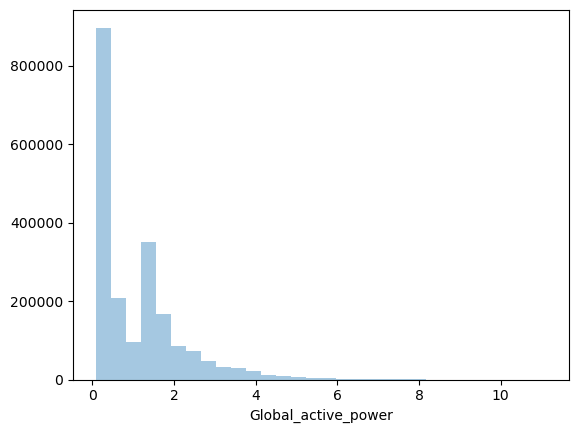

In [19]:
sns.distplot(dataset['Global_active_power'], kde=False, bins=30)

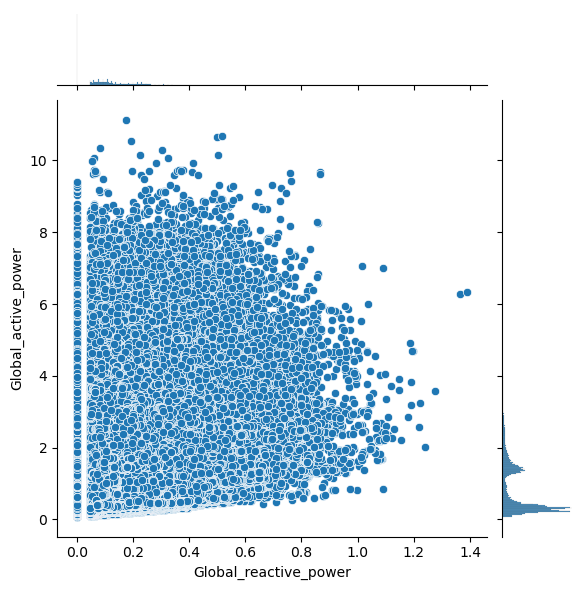

In [20]:
sns.jointplot( x='Global_reactive_power', y='Global_active_power', data=dataset, kind='scatter' )

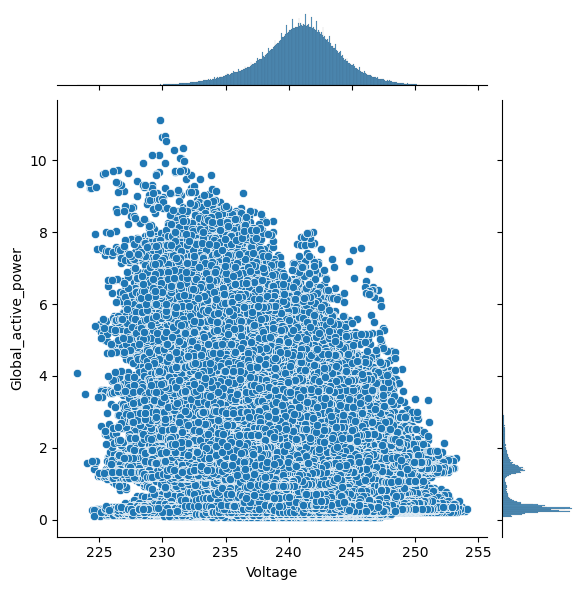

In [21]:
sns.jointplot( x='Voltage', y='Global_active_power', data=dataset, kind='scatter' )

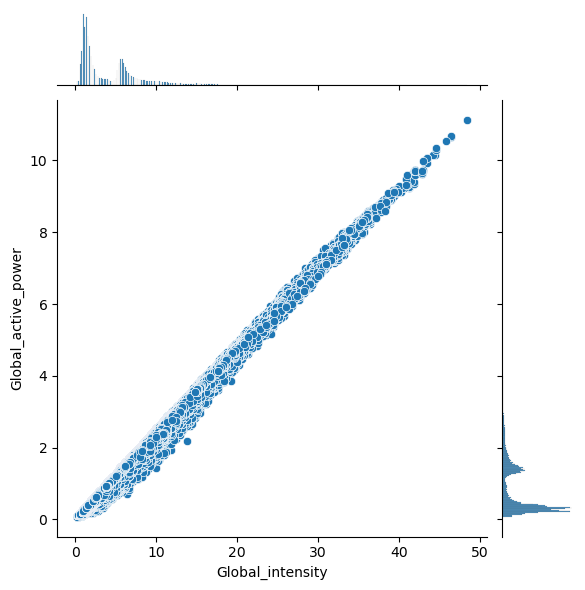

In [22]:
sns.jointplot( x='Global_intensity', y='Global_active_power', data=dataset, kind='scatter' )

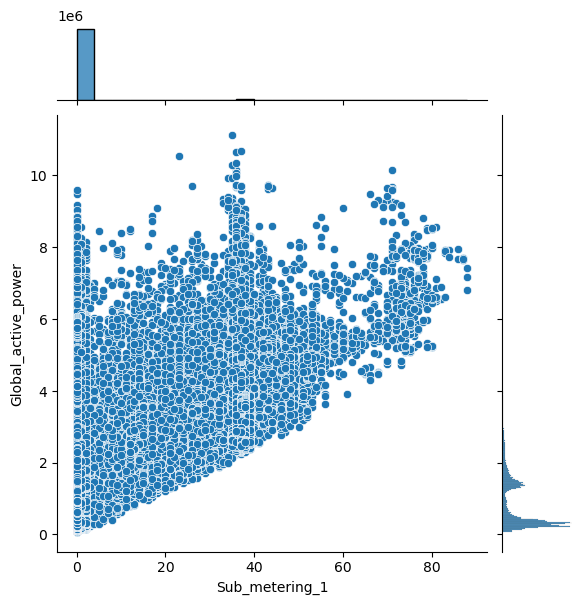

In [23]:
sns.jointplot( x='Sub_metering_1', y='Global_active_power', data=dataset, kind='scatter' )

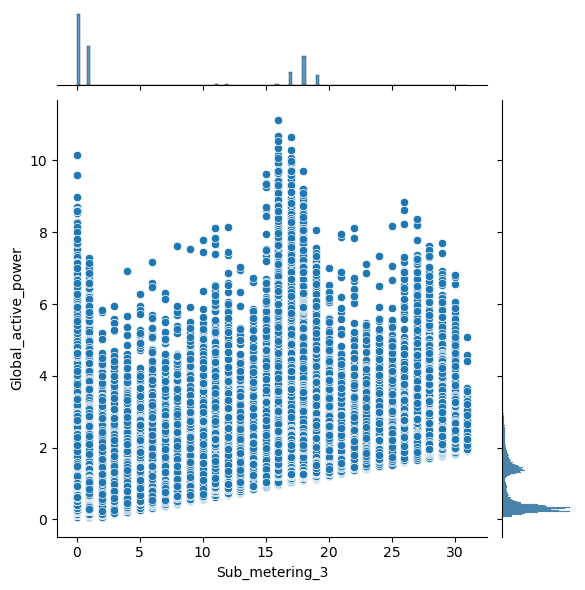

In [24]:
sns.jointplot( x='Sub_metering_3', y='Global_active_power', data=dataset, kind='scatter' )

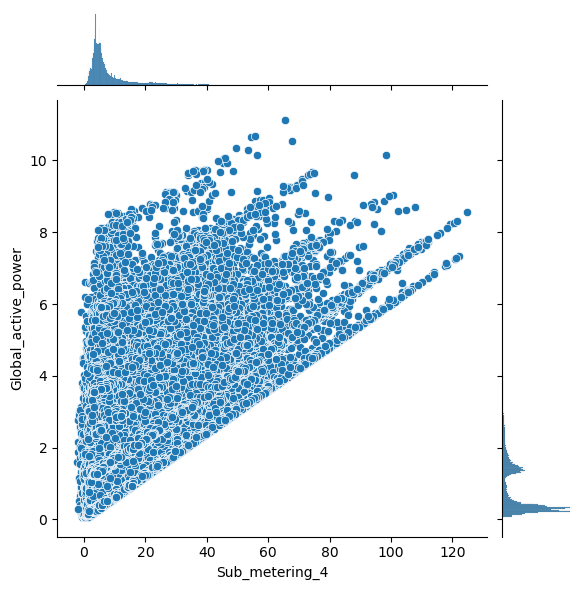

In [25]:
sns.jointplot( x='Sub_metering_4', y='Global_active_power', data=dataset, kind='scatter' )

<AxesSubplot:>

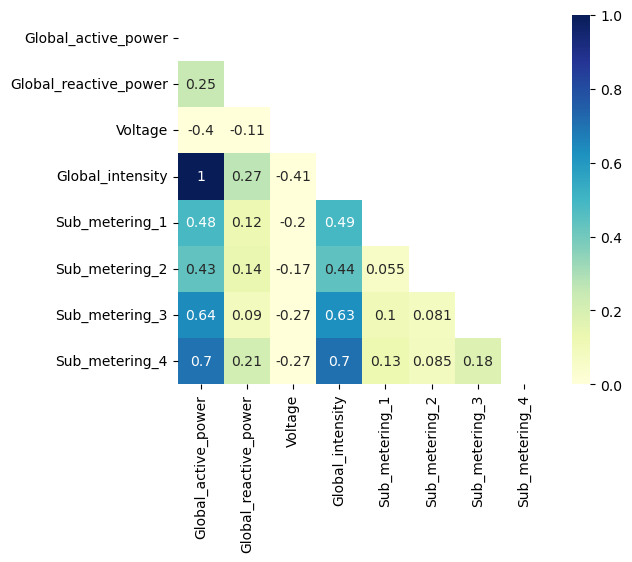

In [26]:
pearson = dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap='YlGnBu', mask=mask)

In [27]:
X = dataset.iloc[:,[3,5,6,7,8]]
y = dataset.iloc[:,2]

In [28]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,18.4,0.0,1.0,17.0
1,0.436,23.0,0.0,1.0,16.0
2,0.498,23.0,0.0,2.0,17.0
3,0.502,23.0,0.0,1.0,17.0
4,0.528,15.8,0.0,1.0,17.0


In [29]:
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


In [31]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [32]:
predictions

array([0.27565968, 0.30255786, 1.31000951, ..., 0.22121899, 0.28905024,
       1.43011432])

In [33]:
from xgboost import XGBRegressor
model2=XGBRegressor()
model2.fit(X_train,y_train)
y_predict2 = model2.predict(X_test)

In [34]:
y_predict2

array([0.28984287, 0.2927099 , 1.3145311 , ..., 0.22254483, 0.27746177,
       1.4470966 ], dtype=float32)

In [35]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_predict1 = model1.predict(X_test)

In [36]:
y_predict1

array([0.2921377 , 0.28697501, 1.3109763 , ..., 0.21993274, 0.27617047,
       1.4490656 ])

In [37]:
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(X_train,y_train)
y_predict3 = model3.predict(X_test)

In [38]:
y_predict3

array([0.27565941, 0.3025588 , 1.31000911, ..., 0.22121916, 0.28904916,
       1.43011517])

In [39]:
y_p1 = lm.predict([[0.418,18.4,0.0,1.0,17.0]])
y_p1

c:\Users\bhase\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.32263977])

In [40]:
## Linear Regression model Evaluation
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('RSquarevalue:',metrics.r2_score(y_test,predictions))

MAE: 0.027503032523892867
MSE: 0.0018276053844901617
RMSE: 0.042750501570041975
RSquarevalue: 0.9983659825017441


In [41]:
# XGBRegressor model Evaluation

from sklearn import metrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict2))
print('MSE:',metrics.mean_squared_error(y_test, y_predict2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict2)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict2))

MAE: 0.02088593924301439
MSE: 0.001136935892443789
RMSE: 0.033718479984183584
RSquarevalue: 0.9989834932866722


In [42]:
# Random Forest model Evaluation

from sklearn import metrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict1))
print('MSE:',metrics.mean_squared_error(y_test, y_predict1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict1)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict1))

MAE: 0.021372549933229998
MSE: 0.0012556256712453035
RMSE: 0.0354348087513578
RSquarevalue: 0.998877375643842


In [43]:
# Ridge Forest model Evaluation

from sklearn import metrics
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_predict3))
print('MSE:',metrics.mean_squared_error(y_test, y_predict3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict3)))
print('RSquarevalue:',metrics.r2_score(y_test,y_predict3))

MAE: 0.027503050053610364
MSE: 0.0018276052844607038
RMSE: 0.04275050040012051
RSquarevalue: 0.998365982591178


In [44]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lm,X,y,cv=5)

In [45]:
np.mean(cv)

0.9983016109615026

In [47]:
import joblib
# Saving the model to a .pkl file
joblib.dump(lm, 'PCASSS_model.pkl')

['PCASSS_model.pkl']